1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Clustered_Customer_Data.csv")


In [3]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


# Data Analysis

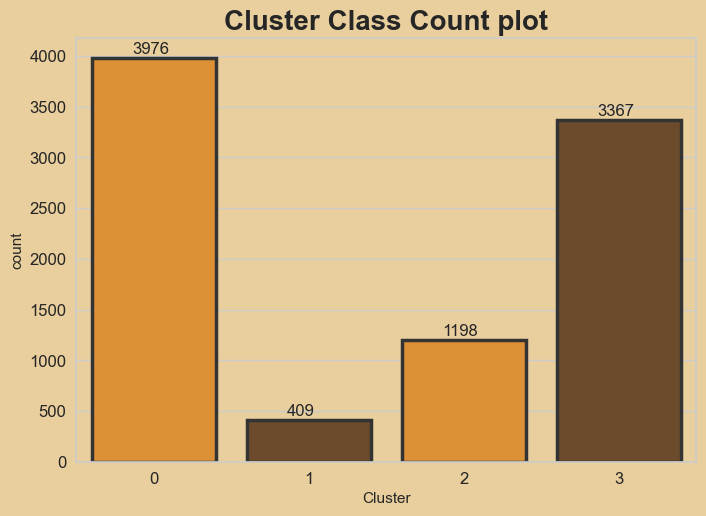

In [6]:
# Data analysis
# Todo: analyze your data here
plt.figure(facecolor='#E9CF9D')
ax = sns.countplot(data=df, x='Cluster', edgecolor='0.2', lw=2.5,  palette=["#F7941C", "#764A23"])
ax.set_facecolor('#E9CF9D')
[ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.26, p.get_height()+45)) for p in ax.patches]
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.title('Cluster Class Count plot', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)
plt.show()

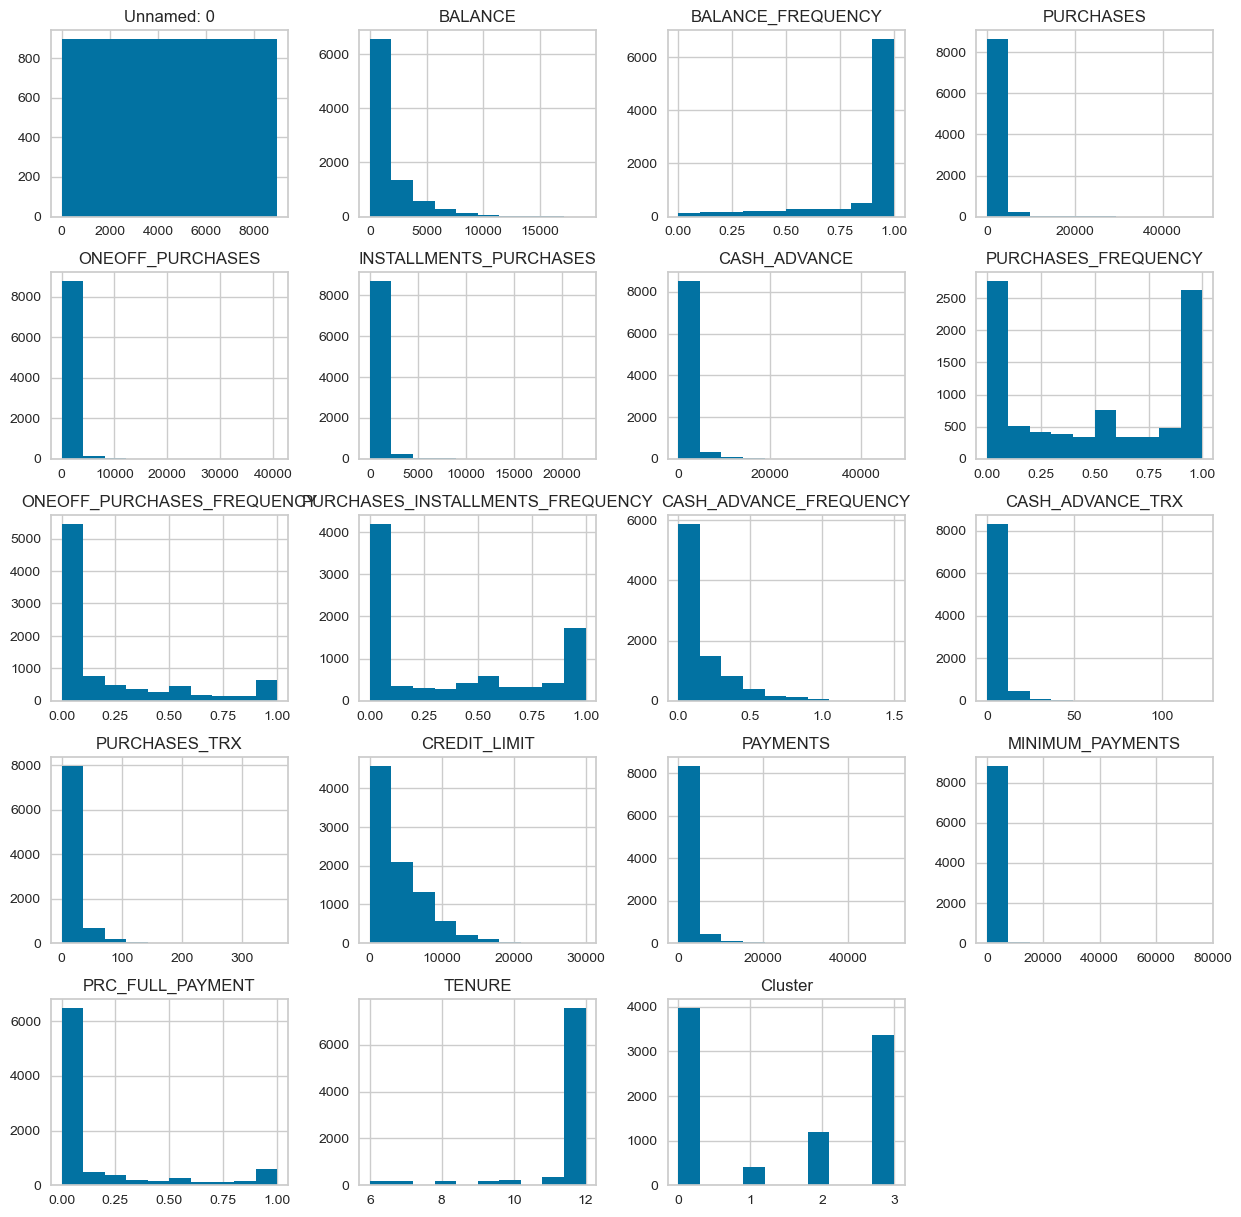

In [7]:
df.hist(figsize=(15, 15))
plt.show()

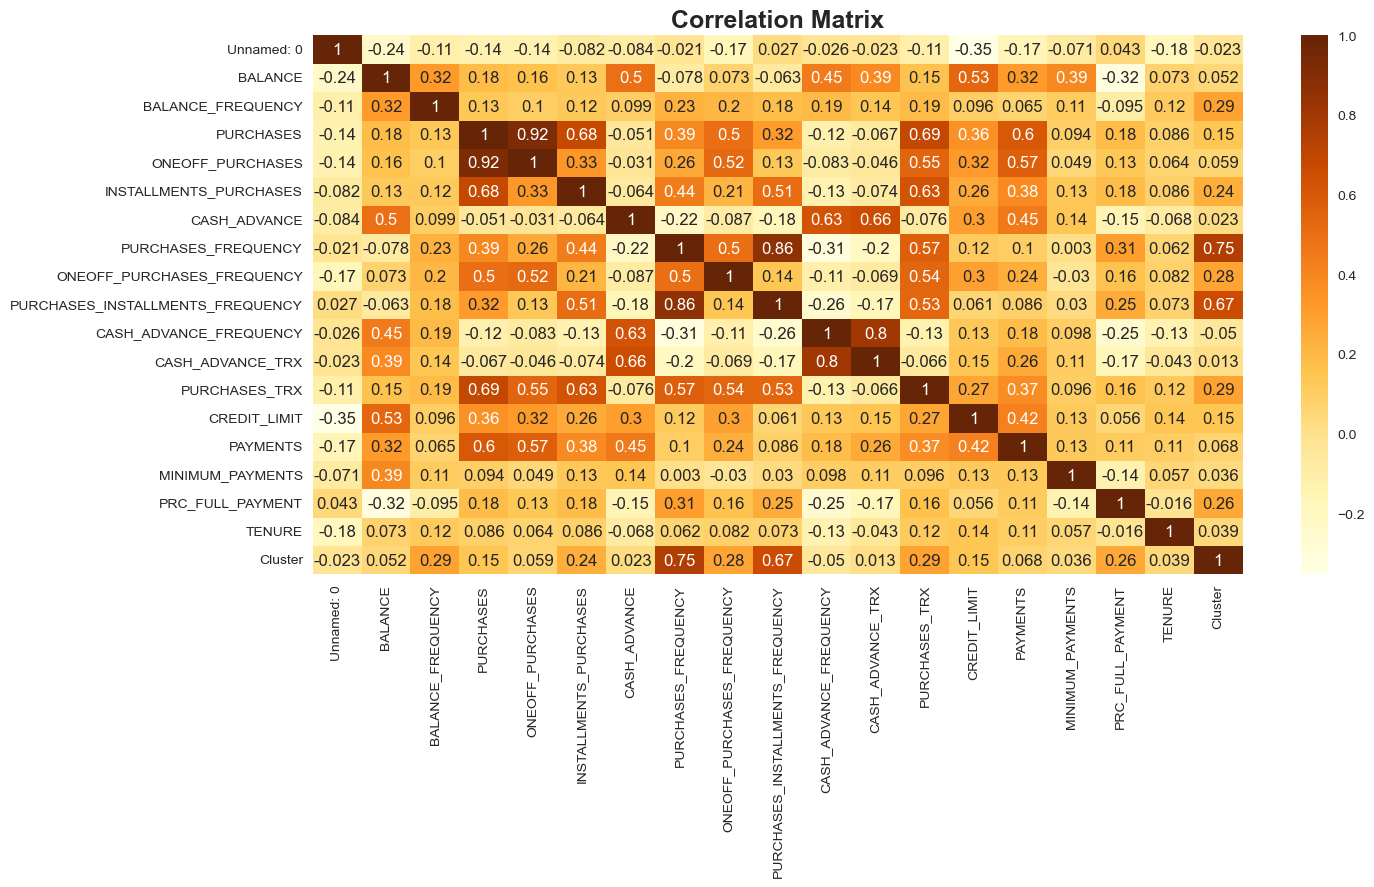

In [8]:
plt.figure(figsize=(15,7))
corrmat = df.corr()
colormap=sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(data=corrmat,annot=True, cmap=colormap)
plt.title('Correlation Matrix', fontsize=18, fontweight="bold")
plt.yticks(rotation=0)
plt.show() # Show heatmap after normalized data

# Data Preprocessing

In [9]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df = df.drop("Unnamed: 0", axis=1)
    df = df.drop("Cluster", axis=1)
    return df

In [10]:
df = preprocessing_data(df)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Feature Engineering

In [11]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)

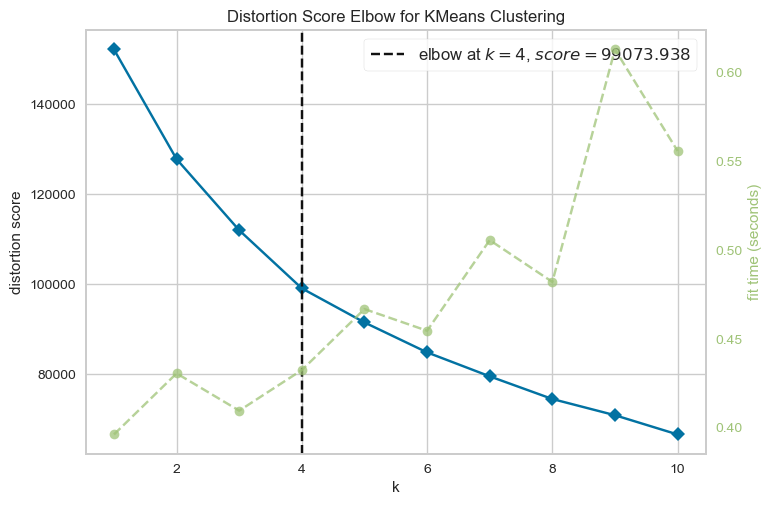

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

# Determine the cluster number

## Apply other methods to compare with elbow

### Phương pháp Đường cong Biến thiên của Trị số Silhouette

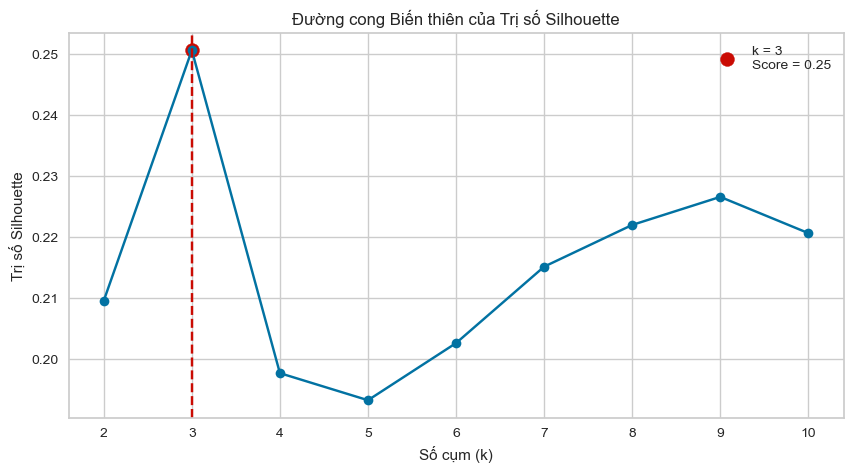

'\nLý do tại sao KElbowVisualizer và phương pháp Trị số Silhouette có thể đưa ra các giá trị k khác nhau \nlà do cách chúng tính toán và đánh giá cấu trúc cụm khác nhau.\n\nKElbowVisualizer trong thư viện Yellowbrick sử dụng phương pháp elbow để đánh giá sự biến đổi của phương sai\ngiữa các cụm với các giá trị k khác nhau. Nó tính toán và vẽ đồ thị của phương sai theo số lượng cụm (k) \nvà chúng ta chọn giá trị k tại điểm "khuỷu" của đường cong elbow. \nĐiểm này thường được coi là giá trị k tối ưu trong phương pháp elbow.\n\nTrong khi đó, phương pháp Trị số Silhouette đo độ tương đồng của mỗi điểm dữ liệu với cụm của nó và \ncác cụm khác. Trị số Silhouette được tính bằng hiệu suất của mỗi điểm dữ liệu trong việc nằm gần cụm của mình\nvà xa các cụm khác. Trong trường hợp này, chúng ta tính Trị số Silhouette cho \ncác giá trị k khác nhau và chọn giá trị k tương ứng với Trị số Silhouette cao nhất.\n\nVì hai phương pháp này sử dụng cách tiếp cận khác nhau và đánh giá các khía cạnh khác nha

In [14]:
# Khảo sát các số cụm từ 2 đến 10
k_values = range(2, 11)

# Tạo list lưu trữ các giá trị Trị số Silhouette và Trung bình Tỷ lệ Nội bộ
silhouette_scores = []

# Lặp qua các số cụm và tính Trị số Silhouette tương ứng
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Tìm điểm cao nhất và vẽ đường sọc cắt xuống
best_k = np.argmax(silhouette_scores) + 2
best_score = silhouette_scores[best_k - 2]

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Trị số Silhouette')
plt.title('Đường cong Biến thiên của Trị số Silhouette')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.scatter(best_k, best_score, color='r', s=100, label=f'k = {best_k}\nScore = {best_score:.2f}')
plt.legend()
plt.show()

## Đánh giá
'''
Lý do tại sao KElbowVisualizer và phương pháp Trị số Silhouette có thể đưa ra các giá trị k khác nhau 
là do cách chúng tính toán và đánh giá cấu trúc cụm khác nhau.

KElbowVisualizer trong thư viện Yellowbrick sử dụng phương pháp elbow để đánh giá sự biến đổi của phương sai
giữa các cụm với các giá trị k khác nhau. Nó tính toán và vẽ đồ thị của phương sai theo số lượng cụm (k) 
và chúng ta chọn giá trị k tại điểm "khuỷu" của đường cong elbow. 
Điểm này thường được coi là giá trị k tối ưu trong phương pháp elbow.

Trong khi đó, phương pháp Trị số Silhouette đo độ tương đồng của mỗi điểm dữ liệu với cụm của nó và 
các cụm khác. Trị số Silhouette được tính bằng hiệu suất của mỗi điểm dữ liệu trong việc nằm gần cụm của mình
và xa các cụm khác. Trong trường hợp này, chúng ta tính Trị số Silhouette cho 
các giá trị k khác nhau và chọn giá trị k tương ứng với Trị số Silhouette cao nhất.

Vì hai phương pháp này sử dụng cách tiếp cận khác nhau và đánh giá các khía cạnh khác nhau của 
cấu trúc cụm, nên có thể dẫn đến các giá trị k khác nhau. Điều này cho thấy rằng không có một 
phương pháp duy nhất để chọn giá trị k tối ưu và quyết định cuối cùng phụ thuộc vào mục tiêu và 
bối cảnh cụ thể của vấn đề clustering của bạn.
'''


## Đường cong Biến thiên của Trung bình Tỷ lệ Nội bộ (calinski_harabasz)

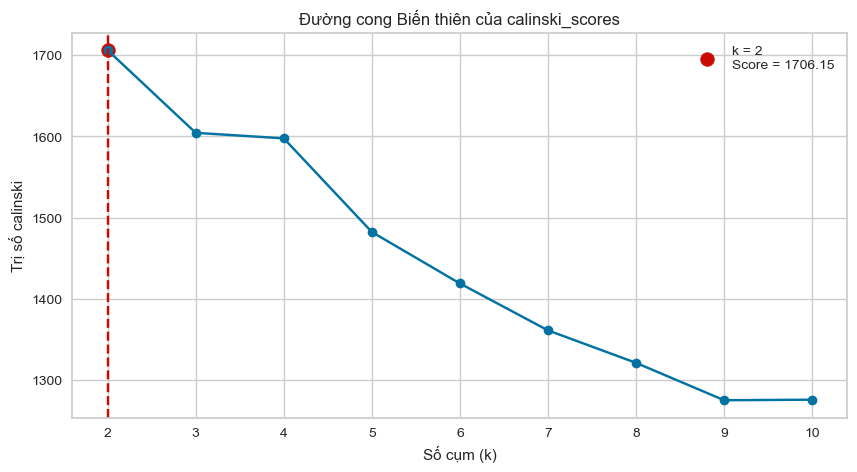

'\nĐiểm Calinski-Harabasz (Calinski-Harabasz score) đo lường sự phân tách giữa các cụm và \nđộ tương đồng trong cụm. Điểm càng cao cho thấy cấu trúc cụm càng tốt. \nTuy nhiên, việc chọn giá trị k tối ưu dựa trên điểm Calinski-Harabasz cần được xem xét kỹ lưỡng.\n\nKhi sử dụng phương pháp Calinski-Harabasz để chọn giá trị k tối ưu, \nđiểm Calinski-Harabasz cao nhất không nhất thiết phải tương ứng với số cụm tối ưu. \nĐiều này có thể xảy ra khi cấu trúc dữ liệu không phù hợp với một số cụm cố định \nhoặc khi phương pháp gom cụm không tìm được cấu trúc cụm tốt cho bộ dữ liệu.\n\nDo đó, khi sử dụng điểm Calinski-Harabasz để chọn giá trị k, \nchúng ta cần cân nhắc và kết hợp với các phương pháp khác như elbow method và silhouette score \nđể đưa ra quyết định cuối cùng về giá trị k tối ưu.\n'

In [15]:
calinski_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    score = calinski_harabasz_score(scaled_data, labels)
    calinski_scores.append(score)

# Tìm điểm cao nhất và vẽ đường sọc cắt xuống
best_k = np.argmax(calinski_scores) + 2
best_score = calinski_scores[best_k - 2]

plt.figure(figsize=(10, 5))
plt.plot(k_values, calinski_scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Trị số calinski')
plt.title('Đường cong Biến thiên của calinski_scores')
plt.axvline(x=best_k, color='r', linestyle='--')
plt.scatter(best_k, best_score, color='r', s=100, label=f'k = {best_k}\nScore = {best_score:.2f}')
plt.legend()
plt.show()
#Đánh giá: 
'''
Điểm Calinski-Harabasz (Calinski-Harabasz score) đo lường sự phân tách giữa các cụm và 
độ tương đồng trong cụm. Điểm càng cao cho thấy cấu trúc cụm càng tốt. 
Tuy nhiên, việc chọn giá trị k tối ưu dựa trên điểm Calinski-Harabasz cần được xem xét kỹ lưỡng.

Khi sử dụng phương pháp Calinski-Harabasz để chọn giá trị k tối ưu, 
điểm Calinski-Harabasz cao nhất không nhất thiết phải tương ứng với số cụm tối ưu. 
Điều này có thể xảy ra khi cấu trúc dữ liệu không phù hợp với một số cụm cố định 
hoặc khi phương pháp gom cụm không tìm được cấu trúc cụm tốt cho bộ dữ liệu.

Do đó, khi sử dụng điểm Calinski-Harabasz để chọn giá trị k, 
chúng ta cần cân nhắc và kết hợp với các phương pháp khác như elbow method và silhouette score 
để đưa ra quyết định cuối cùng về giá trị k tối ưu.
'''

# Model Part

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()
pca = PCA()

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca)])
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'pca__n_components': [2, 3, 4]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(df)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'pca__n_components': 4, 'scaler__feature_range': (0, 1)}
Best score: 10.861192069655445


In [17]:
def build_model(df):


    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(MinMaxScaler(feature_range = (0, 1)),  # Chia tỷ lệ dữ liệu
    PCA(n_components=4),  # Giảm chiều dữ liệu xuống còn 2 chiều
    KMeans(n_clusters=4)  # Sử dụng mô hình KMeans với số cụm là 3
)

    # Todo: fit your model with X, y
    model.fit(df)
    # Todo: fit your model with X, y

    return model
from sklearn.metrics import silhouette_score

def calculate_performance(model, df):
    # Tính SSE
    sse = model.named_steps['kmeans'].inertia_
    
    # Dự đoán nhãn gom cụm
    labels = model.predict(df)
    
    # Tính Silhouette Score
    silhouette_avg = silhouette_score(df, labels)
    
    
    return sse, silhouette_avg
model = build_model(df)  # Xây dựng mô hình
sse, silhouette_avg = calculate_performance(model, df)  # Tính toán hiệu suất

# In ra hiệu suất
print("SSE:", sse)
print("Silhouette Score:", silhouette_avg)

SSE: 1688.201519035879
Silhouette Score: -0.07758010087685759


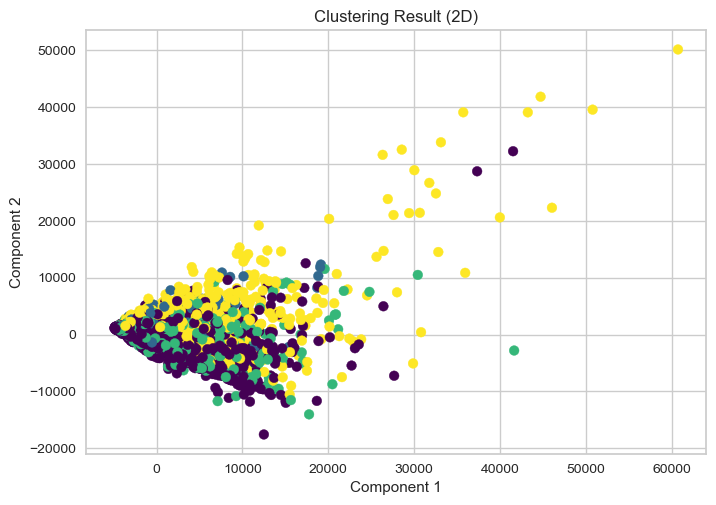

In [18]:


# Giảm chiều dữ liệu xuống 2 chiều bằng PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

# Lấy nhãn cụm từ mô hình
labels = model.predict(df)

# Vẽ biểu đồ scatter plot với màu sắc tương ứng với nhãn cụm

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.title('Clustering Result (2D)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



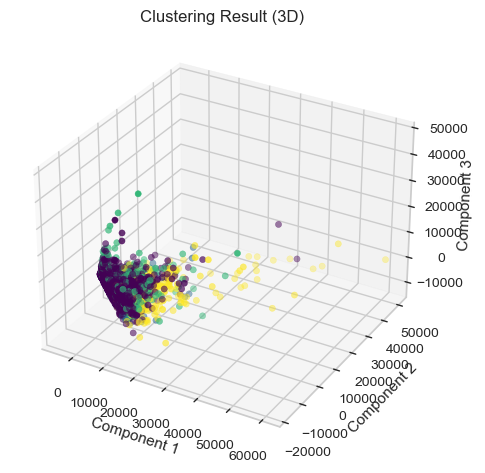

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Giảm chiều dữ liệu xuống 3 chiều bằng PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df)

# Vẽ biểu đồ scatter plot 3D với màu sắc tương ứng với nhãn cụm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=labels, cmap='viridis')
ax.set_title('Clustering Result (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


# Discussion & Conclusion

In [20]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7.Em đã thực hiện một quy trình phân cụm sử dụng K-means và PCA trên dữ liệu. Đầu tiên, em đã chuẩn hóa dữ liệu và giảm chiều dữ liệu bằng MinMaxScaler và PCA. Sau đó, em đã sử dụng K-means để phân cụm dữ liệu. Tuy nhiên, việc lựa chọn số cụm tối ưu đã gặp khó khăn vì các phương pháp đánh giá khác nhau (như Elbow, Silhouette và Calinski-Harabasz) đưa ra số cụm khác nhau. Điều này tạo ra một thách thức để em đưa ra quyết định cuối cùng về số cụm tốt nhất.Em đã tính toán SSE và Silhouette Score để đánh giá hiệu suất phân cụm. Tuy nhiên, việc đánh giá hiệu suất chỉ dựa trên các độ đo này có thể không đủ để đánh giá toàn diện. Sau khi xây dựng mô hình phân cụm, em đã tính toán các độ đo hiệu suất như (Sum of Squared Errors) và Silhouette Score. Tuy nhiên, điểm số SSE thấp không đảm bảo mô hình tốt hơn, và Silhouette Score gần 0 có thể chỉ ra sự chồng chéo giữa các cụm. Em cũng đã trực quan hóa kết quả phân cụm bằng biểu đồ scatter plot.Tóm lại, việc lựa chọn số cụm tối ưu và đánh giá hiệu suất phân cụm là một thách thức. Cần xem xét kết hợp nhiều phương pháp đánh giá và sử dụng sự hiểu biết chuyên môn để em đưa ra quyết định cuối cùng về số cụm tốt nhất và hiệu suất phân cụm." 

In [21]:
get_conclusion()

'7.Em đã thực hiện một quy trình phân cụm sử dụng K-means và PCA trên dữ liệu. Đầu tiên, em đã chuẩn hóa dữ liệu và giảm chiều dữ liệu bằng MinMaxScaler và PCA. Sau đó, em đã sử dụng K-means để phân cụm dữ liệu. Tuy nhiên, việc lựa chọn số cụm tối ưu đã gặp khó khăn vì các phương pháp đánh giá khác nhau (như Elbow, Silhouette và Calinski-Harabasz) đưa ra số cụm khác nhau. Điều này tạo ra một thách thức để em đưa ra quyết định cuối cùng về số cụm tốt nhất.Em đã tính toán SSE và Silhouette Score để đánh giá hiệu suất phân cụm. Tuy nhiên, việc đánh giá hiệu suất chỉ dựa trên các độ đo này có thể không đủ để đánh giá toàn diện. Sau khi xây dựng mô hình phân cụm, em đã tính toán các độ đo hiệu suất như (Sum of Squared Errors) và Silhouette Score. Tuy nhiên, điểm số SSE thấp không đảm bảo mô hình tốt hơn, và Silhouette Score gần 0 có thể chỉ ra sự chồng chéo giữa các cụm. Em cũng đã trực quan hóa kết quả phân cụm bằng biểu đồ scatter plot.Tóm lại, việc lựa chọn số cụm tối ưu và đánh giá hiệu